In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import time
import os
import seaborn as sns
from datetime import datetime

In [2]:
sns.set_style("whitegrid")

In [3]:
#### GILD and GSK
ticker1 = 'GILD'
ticker2= 'GSK'

log_dir = './logs/{}_{}_weighted_1month'.format(ticker1, ticker2)

In [4]:
with open('{}/{}_{}_ratios.pickle'.format(log_dir, ticker1, ticker2), 'rb') as fp:
    ratios = pickle.load(fp)

In [5]:
ratios.shape

(247, 100)

In [6]:
ratios

array([[0.9331734 , 0.94710561, 0.98419585, ..., 0.99180795, 0.98012216,
        0.99353144],
       [0.95734799, 0.98968099, 0.99237521, ..., 0.99673822, 0.97258051,
        0.98825184],
       [0.82963376, 0.96955268, 0.97337559, ..., 0.93181632, 0.99903789,
        0.98828848],
       ...,
       [0.95751953, 0.9829414 , 0.99634991, ..., 0.97599269, 0.85720968,
        0.96094513],
       [0.96292063, 0.97314738, 0.98779559, ..., 0.97845561, 0.84431999,
        0.98842006],
       [1.        , 1.        , 1.        , ..., 0.98576472, 0.59068007,
        0.94804376]])

In [7]:
# Given a weight, find the min among all dates
ratios.min(axis=0).shape

(100,)

In [8]:
(ratios.min(axis=0) <= 0.9).sum()

99

In [9]:
across_time = pd.DataFrame({'Ratios': ratios.min(axis=0)})

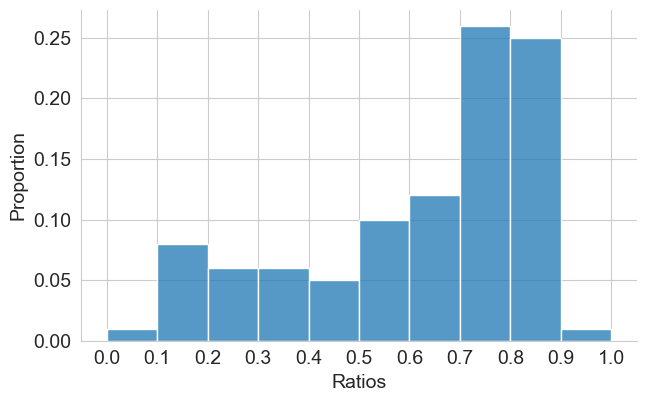

In [10]:
sns.displot(across_time['Ratios'], stat='probability', color='tab:blue', bins=np.linspace(0.0, 1.0, num=11), height=4, aspect=1.6) # ,, )
plt.xticks(np.linspace(0.0, 1.0, num=11), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Ratios', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.savefig('./{}_{}_min_across_time.pdf'.format(ticker1, ticker2), format='pdf',
            dpi=1000, bbox_inches='tight', pad_inches=0.1)
# plt.show()

In [11]:
# Given a date, find the min among all weights
ratios.min(axis=1).shape

(247,)

In [12]:
(ratios.min(axis=1) < 0.9).sum()/247

0.8866396761133604

In [13]:
across_weights = pd.DataFrame({'Ratios': ratios.min(axis=1)})

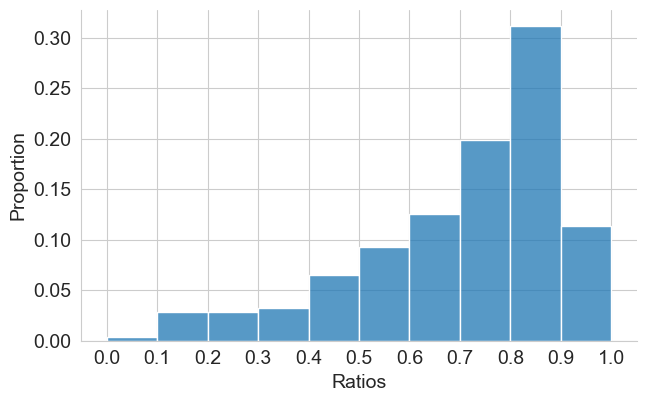

In [14]:
sns.displot(across_weights['Ratios'], stat='probability', color='tab:blue', bins=np.linspace(0.0, 1.0, num=11), height=4, aspect=1.6) # ,, )
plt.xticks(np.linspace(0.0, 1.0, num=11), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Ratios', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.savefig('./{}_{}_min_across_weights.pdf'.format(ticker1, ticker2), format='pdf',
            dpi=1000, bbox_inches='tight', pad_inches=0.1)

In [15]:
# given a weighting parameter, calculate the mean across date
ratios.mean(axis=0).shape

(100,)

In [16]:
mean_time = pd.DataFrame({'Ratios': ratios.mean(axis=0)})

In [17]:
mean_time.min()

Ratios    0.884031
dtype: float64

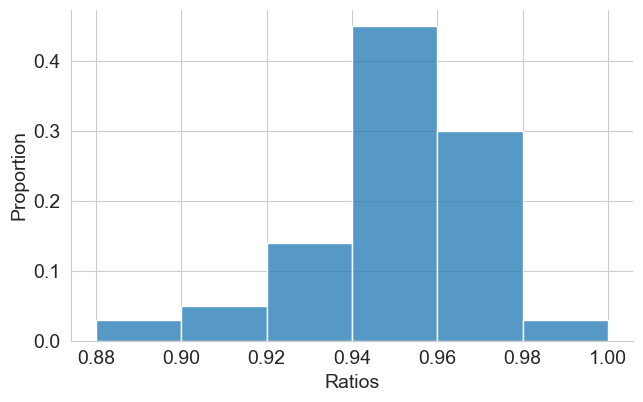

In [18]:
sns.displot(mean_time['Ratios'], stat='probability', color='tab:blue', bins=np.linspace(0.88, 1.0, num=7), height=4, aspect=1.6) # ,, )
plt.xticks(np.linspace(0.88, 1.0, num=7), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Ratios', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.savefig('./{}_{}_mean_across_time.pdf'.format(ticker1, ticker2), format='pdf',
            dpi=1000, bbox_inches='tight', pad_inches=0.1)